In [36]:
import numpy as np

### 3.1.3 Classification of samples that are not linearly separable

In [37]:
n = 100

# label a
mA = [-3, 2]
sigma = 0.5
aX1 = np.random.normal(mA[0], sigma, n)
aX2 = np.random.normal(mA[1], sigma, n)
a = np.vstack((aX1, aX2, np.zeros(n)))
a.shape, a[:,:5]

((3, 100),
 array([[-3.75762319, -3.06880675, -3.1321613 , -2.90878313, -3.79585455],
        [ 1.53870147,  1.93652375,  1.97714048,  2.43235801,  2.42408851],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]]))

In [38]:
# label b
mB = [-2, 1]
bX1 = np.random.normal(mB[0], sigma, n)
bX2 = np.random.normal(mB[1], sigma, n)
b = np.vstack((bX1, bX2, np.ones(n)))
b.shape, b[:,:5]

((3, 100),
 array([[-1.67641447, -3.12929692, -2.59546354, -2.43025003, -1.83324769],
        [ 0.81824576,  1.18795745,  1.52907546,  0.23219627,  0.89483248],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]]))

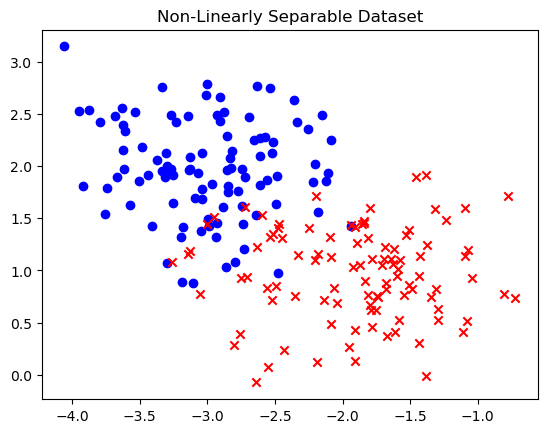

In [39]:
import matplotlib.pyplot as plt
plt.title("Non-Linearly Separable Dataset")
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.show()

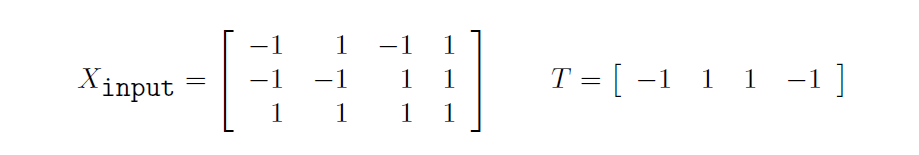

In [40]:
dataset = np.hstack((a,b))
dataset[:,:5], dataset.shape

(array([[-3.75762319, -3.06880675, -3.1321613 , -2.90878313, -3.79585455],
        [ 1.53870147,  1.93652375,  1.97714048,  2.43235801,  2.42408851],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]]),
 (3, 200))

In [41]:
# shuffling the dataset horizontally...
rng = np.random.default_rng()
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[-1.64002574, -1.31308662, -1.62257276, -3.62158098, -2.72436386],
       [ 1.1054169 ,  1.59196286,  1.20349341,  2.15471808,  1.89265164],
       [ 1.        ,  1.        ,  1.        ,  0.        ,  0.        ]])

In [42]:
dataset = np.vstack((np.ones(2*n), dataset))
dataset.shape, dataset[:,:5]

((4, 200),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-1.64002574, -1.31308662, -1.62257276, -3.62158098, -2.72436386],
        [ 1.1054169 ,  1.59196286,  1.20349341,  2.15471808,  1.89265164],
        [ 1.        ,  1.        ,  1.        ,  0.        ,  0.        ]]))

In [43]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 200), (200,))

The weights are stored in matrix W with as many columns as the dimensionality of the input patterns and with the number of rows matching the number of the
outputs (dimensionality of the output).

----------

### Part 1
Apply and compare perceptron learning and the delta rules using either batch or sequential learning mode, similarly as in the previous exercise (p.1, section 3.1.2).

**Perceptron Learning Principle**: weights are changed whenever a pattern is misclassified

### Perceptron Perceptron

In [44]:
class PerceptronLearningClassifier:
    def __init__(self, learning_rate):
        self.W = np.random.rand(3)
        self.learning_rate = learning_rate
        self.epochs = 0

    def predict(self, X):
        #print(np.array((self.W @ X) > 0, dtype=int))
        return np.array((self.W @ X) > 0, dtype=int)

    def fit(self, X, y, n_epochs, batch_size = 0):
        if (batch_size == 0):
            for i in range(0, n_epochs):
                predictions = self.predict(X)
                e = y_train - predictions
                dW = self.learning_rate * (e @ X.T)
                self.W += dW

                nErrors = np.sum( np.array(e != 0, dtype=int) )
                print("After {} epochs: {} errors".format(self.epochs, nErrors))
                self.epochs += 1
                if (nErrors == 0):
                    return True
            return False
                

    def fit_one_epoch(self, X, y):
        nErrors = 0
        for i in range(0, X.shape[1]):
            prediction = np.array((self.W @ X[:,i]) > 0, dtype=int)
            e = y[i] - prediction
            if (e != 0):
                nErrors += 1
            dW = self.learning_rate * (e * X[:,i])
            self.W = self.W + dW
        print("Errors this epoch:" + str(nErrors))
        if (nErrors == 0):
            return True
        else:
            return False

In [45]:
p1 = PerceptronLearningClassifier(0.1)

#### Initial Weights Plot

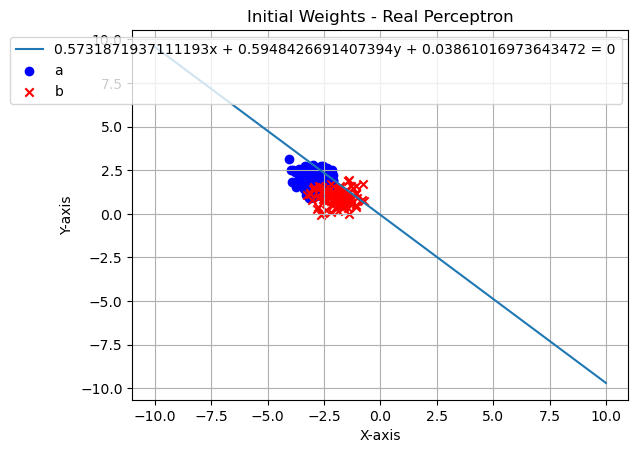

[0.03861017 0.57318719 0.59484267]


In [46]:
x = np.linspace(-10, 10, 10)
a = p1.W[1]
b = p1.W[2]
c = p1.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Initial Weights - Real Perceptron")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p1.W)

#### Final weights plot

After 0 epochs: 97 errors
After 1 epochs: 100 errors
After 2 epochs: 100 errors
After 3 epochs: 100 errors
After 4 epochs: 100 errors
After 5 epochs: 99 errors
After 6 epochs: 100 errors
After 7 epochs: 100 errors
After 8 epochs: 41 errors
After 9 epochs: 99 errors
After 10 epochs: 100 errors
After 11 epochs: 100 errors
After 12 epochs: 30 errors
After 13 epochs: 41 errors
After 14 epochs: 95 errors
After 15 epochs: 100 errors
After 16 epochs: 100 errors
After 17 epochs: 37 errors
After 18 epochs: 79 errors
After 19 epochs: 100 errors
After 20 epochs: 22 errors
After 21 epochs: 21 errors
After 22 epochs: 19 errors
After 23 epochs: 18 errors
After 24 epochs: 18 errors
After 25 epochs: 16 errors
After 26 epochs: 20 errors
After 27 epochs: 20 errors
After 28 epochs: 28 errors
After 29 epochs: 63 errors
After 30 epochs: 99 errors
After 31 epochs: 75 errors
After 32 epochs: 99 errors
After 33 epochs: 21 errors
After 34 epochs: 41 errors
After 35 epochs: 95 errors
After 36 epochs: 100 errors

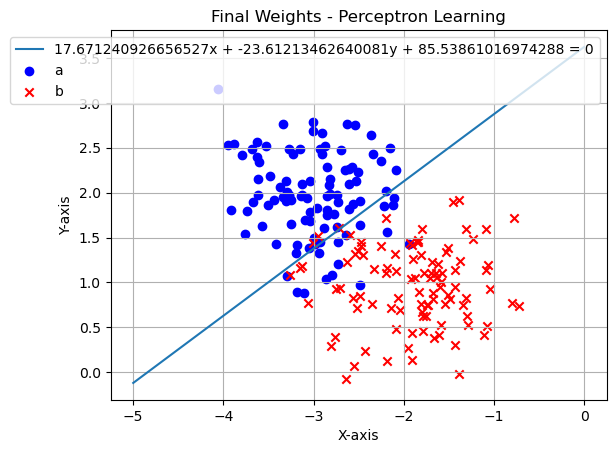

[ 85.53861017  17.67124093 -23.61213463]


In [47]:
while (p1.fit(X_train, y_train, 1) == False):
    if (p1.epochs > 5000):
        print("No convergence after 5000 epochs...")
        break
    pass

x = np.linspace(-5, 0, 10)
a = p1.W[1]
b = p1.W[2]
c = p1.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Final Weights - Perceptron Learning")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p1.W)

After 5000 epochs there still is no convergence: even though this is in theory not enough to determine the two classes aren't linearly separable, we can be fairly sure about it

------------

### Delta Rule Perceptron

In [48]:
y_train = y_train * 2 - 1 # {0,1} - > {-1, +1}
y_train[:5]

array([ 1.,  1.,  1., -1., -1.])

In [49]:
class PerceptronDeltaRuleClassifier:
    def __init__(self, learning_rate):
        self.W = np.random.rand(3)
        self.learning_rate = learning_rate
        self.epochs = 0

    def predict(self, X):
        return np.array((self.W @ X) > 0, dtype=int) * 2 - 1

    def fit(self, X, y, n_epochs, batch_size = 0):
        if (batch_size == 0):
            for _ in range(0, n_epochs):
                predictions = self.W @ X # without step function
                e = y - predictions 
                dW = self.learning_rate * (e @ X.T)
                self.W += dW

                predErrors = y - ( np.array((self.W @ X) > 0, dtype=int) * 2 - 1 )
                nErrors = np.sum( np.array(predErrors != 0, dtype=int))
                print("After {} epochs: {} errors".format(self.epochs, nErrors))
                self.epochs += 1
                if (nErrors == 0):
                    return True
        else:
            for _ in range(0, n_epochs):
                idx = 0
                while (idx < X.shape[1]):
                    next_idx = idx + batch_size
                    print(X[:, idx:next_idx].shape)
                    predictions = self.W @ X[:, idx:next_idx] # without step function
                    print(predictions.shape)
                    e = y[idx:next_idx] - predictions
                    print(e.shape)
                    dW = self.learning_rate * (e @ X[:, idx:next_idx])
                    self.W += dW

                    self.epochs += 1
                    idx = next_idx
                    print("done")
        
    def fit_one_epoch(self, X, y):
        for i in range(0, X.shape[1]): # for each sample
        # for i in range(0, 3):
            prediction = self.W @ X[:,i]    # compute the prediction 
            #print(prediction)
            e = y[i] - prediction         # calculate the error
            print(e)
            dW = self.learning_rate * (e * X[:,i])  
            #print(dW)
            self.W = self.W + dW
            #print(self.W)
            if (i%10 == 0):
                print("Weights after {} points: {}".format(i, self.W))

        # after the epoch see how many are wrongly classified
        pred_labels = self.predict(X)
        pred_errors = y - pred_labels
        nErrors = np.sum(np.array(pred_errors != 0, dtype=int))
        print("Errors after this epoch:" + str(nErrors))

In [50]:
p2 = PerceptronDeltaRuleClassifier(0.01)

In [51]:
p2.W

array([0.05071311, 0.13289099, 0.53825961])

In [52]:
X_train[:, :5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-1.64002574, -1.31308662, -1.62257276, -3.62158098, -2.72436386],
       [ 1.1054169 ,  1.59196286,  1.20349341,  2.15471808,  1.89265164]])

In [53]:
# p2.fit_one_epoch(X_train, y_train)
# p2.W

#### Initial weights plot

[0.05071311 0.13289099 0.53825961]
0.1328909913006574 0.5382596127676534 0.05071310884336944


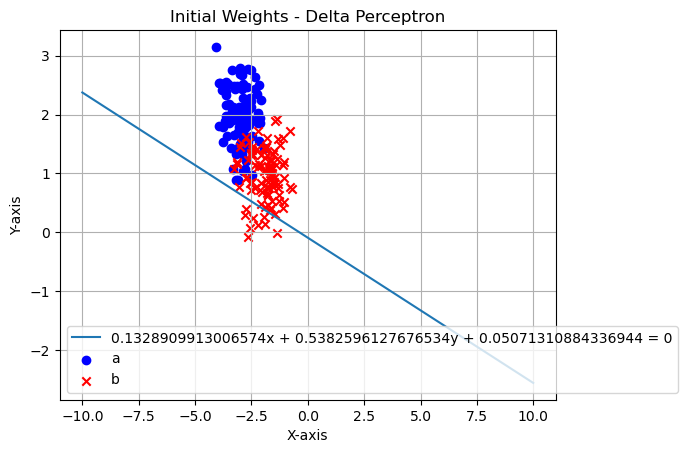

[0.05071311 0.13289099 0.53825961]


In [54]:
x = np.linspace(-10, 10, 10)
print(p2.W)
a = p2.W[1]
b = p2.W[2]
c = p2.W[0]
print(a,b,c)
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p2.W)

In [55]:
p2.W

array([0.05071311, 0.13289099, 0.53825961])

#### Final weights plot

In [56]:
# for _ in range(200):
#     p2.fit(X_train, y_train, 1, 20)

for _ in range(200):
    p2.fit_one_epoch(X_train, y_train)


0.5722302634545484
Weights after 0 points: [0.05643541 0.12350627 0.54458514]
0.23877969753827555
0.47650785881834656
-1.8496312122675702
-1.5290558308365454
-1.388829695816355
-1.155191129148397
1.39775114079209
1.261445021722644
1.0669480512526226
-1.251994843898069
Weights after 10 points: [0.0291027  0.25438209 0.43447364]
-1.3660593725963623
-0.897034692526202
-0.778286318150813
-0.6461497228852544
1.329589558671882
0.9742974948741517
-0.7562045397008003
1.148306935266615
-0.3369877942681655
1.2399632945040142
Weights after 20 points: [0.02821705 0.32930995 0.38090826]
-0.8327358540303672
-1.0958571798933763
-0.4793420394121206
-0.2607818461331267
1.2525307594654302
1.207839000609808
1.2642975940587995
-0.6978837406190401
-0.9484633288302393
-0.9990357387417379
Weights after 30 points: [0.01232273 0.39819142 0.31692547]
-0.3917291544076632
1.835027093683252
1.590131508809697
1.1755136383088092
0.9411180557288508
-0.8282467815363315
1.732380079133832
1.5122855340796004
0.9904455675

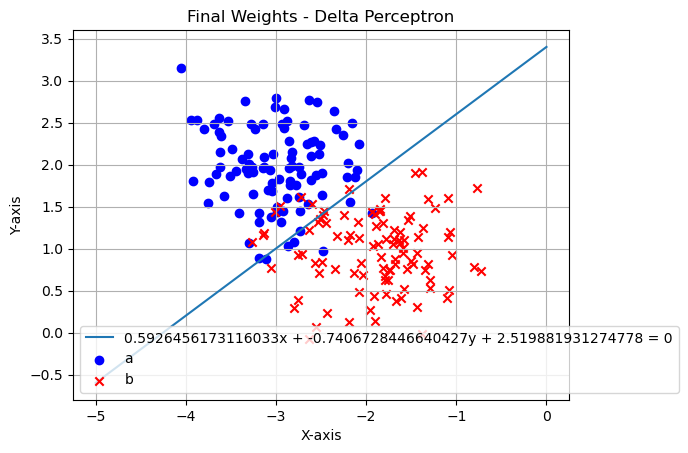

[ 2.51988193  0.59264562 -0.74067284]


In [57]:
x = np.linspace(-5, 0, 10)
a = p2.W[1]
b = p2.W[2]
c = p2.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.title("Final Weights - Delta Perceptron")

plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p2.W)

------------------

----------------

-------------


# Assignment from now on

Then apply the delta learning rule in batch mode to this new dataset as well as to different versions of the subsampled data, i.e. before training please remove 25% of data samples (for two classes with n=100 samples each, remove 50 samples) according to the following scenarios:
- random 25% from each class
- random 50% from classA
- random 50% from classB
- 20% from a subset of classA for which classA(1,:)<0 and 80% from a
subset of classA for which classA(1,:)>0

### Let's generate the dataset again

In [58]:
n = 100

# label a
mA = [1.0, 0.3]
sigma = 0.2
aX1 = np.random.normal(mA[0], sigma, n)
aX2 = np.random.normal(mA[1], sigma, n)
a = np.vstack((aX1, aX2, (-1) * np.ones(n)))
a.shape, a[:,:5]

((3, 100),
 array([[ 1.25857668,  1.19077564,  1.15842645,  1.33211498,  1.15927168],
        [ 0.36391676,  0.30369988,  0.21589774,  0.0981136 ,  0.06347514],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]))

In [59]:
# label b
mB = [0, -0.1]
sigma = 0.5
bX1 = np.random.normal(mB[0], sigma, n)
bX2 = np.random.normal(mB[1], sigma, n)
b = np.vstack((bX1, bX2, np.ones(n)))
b.shape, b[:,:5]

((3, 100),
 array([[-0.20376937,  0.36654213,  0.10955943,  0.37976463, -0.28806553],
        [ 0.71124592, -0.11882495,  0.07345903, -0.37553714,  0.62123583],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]]))

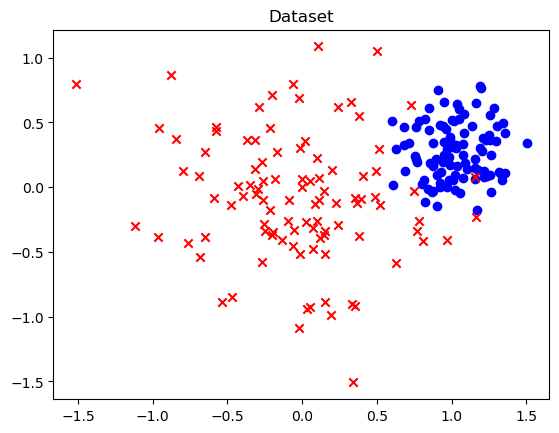

In [60]:
import matplotlib.pyplot as plt
plt.title("Dataset")

plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')

Shuffling the two classes..

In [61]:
rng = np.random.default_rng()
rng.shuffle(a, axis=1)
rng.shuffle(b, axis=1)

## (1)

... then taking out 25% from each

In [62]:
lim = int(0.75*n)
a_holdout = a[:, lim:]
a_new = a[:, :lim]
a_new.shape, a_holdout.shape

((3, 75), (3, 25))

In [63]:
a_new[:,:5]

array([[ 0.98796066,  0.93963133,  0.82262388,  0.95734299,  1.25857668],
       [ 0.3648956 ,  0.19347596,  0.52349499,  0.22299518,  0.36391676],
       [-1.        , -1.        , -1.        , -1.        , -1.        ]])

In [64]:
lim = int(0.75*n)
b_holdout = b[:, lim:]
b_new = b[:, :lim]
b_new.shape, b_holdout.shape

((3, 75), (3, 25))

In [65]:
dataset = np.hstack((a_new,b_new))
dataset[:,:5], dataset.shape

(array([[ 0.98796066,  0.93963133,  0.82262388,  0.95734299,  1.25857668],
        [ 0.3648956 ,  0.19347596,  0.52349499,  0.22299518,  0.36391676],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]),
 (3, 150))

shuffle the entire dataset

In [66]:
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 1.08050653e+00,  2.26403654e-01, -2.73245461e-05,
        -6.24788357e-02,  1.03881674e+00],
       [ 4.17268329e-01, -1.22464174e-01,  6.36740274e-02,
         7.95148067e-01,  6.45915348e-01],
       [-1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00, -1.00000000e+00]])

stack the bias

In [67]:
dataset = np.vstack((np.ones(2*lim), dataset))
dataset.shape, dataset[:,:5]

((4, 150),
 array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00],
        [ 1.08050653e+00,  2.26403654e-01, -2.73245461e-05,
         -6.24788357e-02,  1.03881674e+00],
        [ 4.17268329e-01, -1.22464174e-01,  6.36740274e-02,
          7.95148067e-01,  6.45915348e-01],
        [-1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00, -1.00000000e+00]]))

split in X and y

In [68]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 150), (150,))

In [69]:
X_train[:,:5], y_train[:5]

(array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00],
        [ 1.08050653e+00,  2.26403654e-01, -2.73245461e-05,
         -6.24788357e-02,  1.03881674e+00],
        [ 4.17268329e-01, -1.22464174e-01,  6.36740274e-02,
          7.95148067e-01,  6.45915348e-01]]),
 array([-1.,  1.,  1.,  1., -1.]))

initialize a DeltaRulePerceptron

In [70]:
y_train[:5]

array([-1.,  1.,  1.,  1., -1.])

In [71]:
p = PerceptronDeltaRuleClassifier(0.01)

- show initial weights

In [72]:
x = np.linspace(-1, 2, 10)

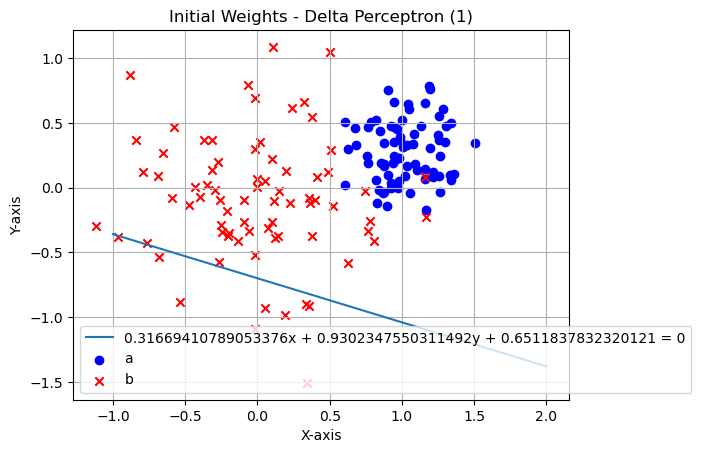

[0.65118378 0.31669411 0.93023476]


In [73]:
_a = p.W[1]
_b = p.W[2]
_c = p.W[0]
y = (-_a / _b) * x - (_c / _b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron (1)")

plt.plot(x, y, label=f'{_a}x + {_b}y + {_c} = 0')
plt.scatter(a_new[0,:], a_new[1,:], c='b', label='a', marker='o')
plt.scatter(b_new[0,:], b_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p.W)

... train and then plot...

In [74]:
for _ in range(200):
    p.fit_one_epoch(X_train, y_train)

-2.3815313372871945
Weights after 0 points: [0.62736847 0.29096151 0.92029738]
0.4194602402912557
0.30987857213934533
-0.3479447088664891
-2.5270931855039658
0.22059308627163488
-0.6156110365383822
-1.8466833648565326
1.2524554378696755
0.2870317407457166
0.5622863720195448
Weights after 10 points: [0.6045122  0.24504848 0.88322681]
-1.9803601087121097
-2.4511593733354484
0.22666761047919037
-1.7147009289540938
0.3369676480166741
0.7481327377915399
-2.3379682889861977
0.8127998931029097
-2.0678836106359917
-0.13085013947275015
Weights after 20 points: [0.51892866 0.12957178 0.83419915]
-1.7790139223367256
0.6902987808212437
0.7202694557922682
-1.8240141302825559
-1.5976082333244195
0.6822159335747632
-1.6872485277711422
-1.8985720858893846
-1.580482983847333
0.2767204712496655
Weights after 30 points: [0.4389543  0.02278423 0.81057245]
-1.5306483651435028
1.0461830645017685
-2.0754256691534594
0.49593967994775656
-1.7123529548605094
-1.3654831688596196
-1.7233391964560614
0.93973161144

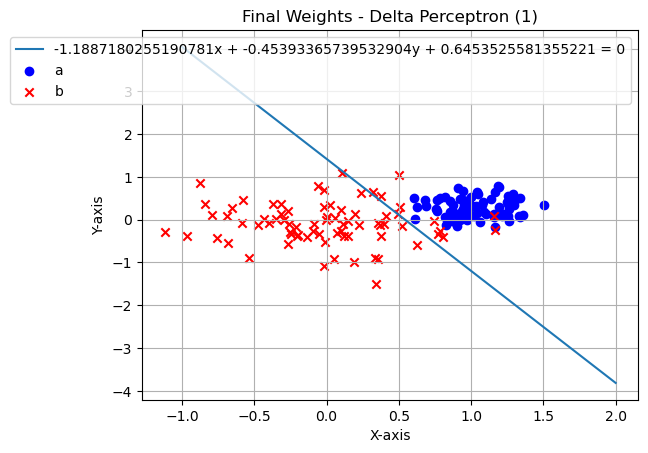

[ 0.64535256 -1.18871803 -0.45393366]


In [75]:
_a = p.W[1]
_b = p.W[2]
_c = p.W[0]
y = (-_a / _b) * x - (_c / _b) # ax + by + c = 0
plt.title("Final Weights - Delta Perceptron (1)")

plt.plot(x, y, label=f'{_a}x + {_b}y + {_c} = 0')
plt.scatter(a_new[0,:], a_new[1,:], c='b', label='a', marker='o')
plt.scatter(b_new[0,:], b_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p.W)

.. as expected there's no difference in evidence

In [76]:
holdout = np.hstack((a_holdout, b_holdout))
holdout[:,:5]

array([[ 1.08615386,  0.76170552,  1.15842645,  0.89433785,  0.71181943],
       [ 0.56248996,  0.21874053,  0.21589774,  0.21997695,  0.33773694],
       [-1.        , -1.        , -1.        , -1.        , -1.        ]])

In [77]:
X_holdout = np.vstack((np.ones(50), holdout[:2, :]))
y_holdout = holdout[2,:]
X_holdout[:,:5], y_holdout[:5]

(array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.08615386, 0.76170552, 1.15842645, 0.89433785, 0.71181943],
        [0.56248996, 0.21874053, 0.21589774, 0.21997695, 0.33773694]]),
 array([-1., -1., -1., -1., -1.]))

In [78]:
predictions = p.predict(X_holdout)
diff = predictions - y_holdout
predictions, diff

(array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., -2.,  0., -2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))

In [79]:
accuracy = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy

0.96

In [80]:
# accuracy on a
diff = predictions[:25] - y_holdout[:25] #the as are before
predictions[:25], y_holdout[:25], diff

(array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]))

In [81]:
accuracy_a = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy_a

1.0

In [82]:
# accuracy on b
diff = predictions[25:] - y_holdout[25:] #the as are before
predictions[25:], y_holdout[25:], diff

(array([ 1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., -2.,  0., -2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))

In [83]:
accuracy_b = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy_b

0.92

-------------

- random 50% from classA

In [84]:
lim = int(0.5*n)
a_holdout = a[:, lim:]
a_new = a[:, :lim]
a_new.shape, a_holdout.shape

((3, 50), (3, 50))

In [85]:
b_new = b
b.shape

(3, 100)

In [86]:
dataset = np.hstack((a_new,b_new))
dataset[:,:5], dataset.shape

(array([[ 0.98796066,  0.93963133,  0.82262388,  0.95734299,  1.25857668],
        [ 0.3648956 ,  0.19347596,  0.52349499,  0.22299518,  0.36391676],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]),
 (3, 150))

In [87]:
dataset = np.vstack((np.ones(150), dataset))
dataset.shape, dataset[:,:5]

((4, 150),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 0.98796066,  0.93963133,  0.82262388,  0.95734299,  1.25857668],
        [ 0.3648956 ,  0.19347596,  0.52349499,  0.22299518,  0.36391676],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]))

In [88]:
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 0.60416305, -0.24636445,  0.11216623, -0.21374443,  1.03776583],
       [ 0.50933975, -0.34050803, -0.0999595 ,  0.45834139,  0.16567683],
       [-1.        ,  1.        ,  1.        ,  1.        , -1.        ]])

In [89]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 150), (150,))

In [90]:
p = PerceptronDeltaRuleClassifier(0.01)

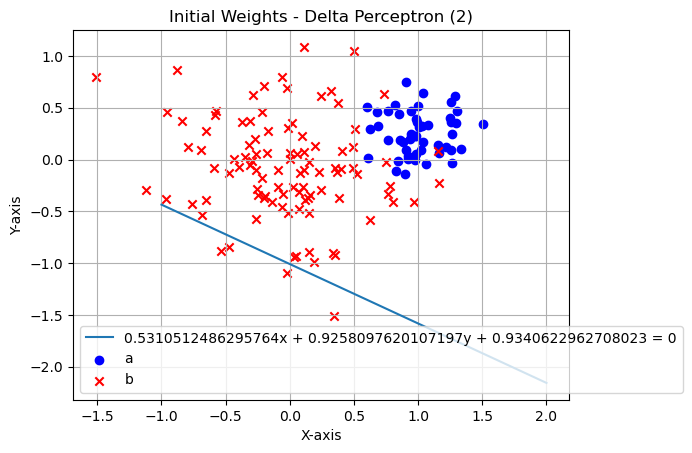

[0.9340623  0.53105125 0.92580976]


In [91]:
_a = p.W[1]
_b = p.W[2]
_c = p.W[0]
y = (-_a / _b) * x - (_c / _b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron (2)")

plt.plot(x, y, label=f'{_a}x + {_b}y + {_c} = 0')
plt.scatter(a_new[0,:], a_new[1,:], c='b', label='a', marker='o')
plt.scatter(b_new[0,:], b_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p.W)

In [92]:
for _ in range(200):
    p.fit_one_epoch(X_train, y_train)

-2.72645554604697
Weights after 0 points: [0.90679774 0.51457901 0.91192284]
0.5304932835577172
0.12130031821015297
-0.22066602089390885
-2.5949934488055497
0.3382821826065099
0.14230218573886222
-2.629693667354889
0.2784417299270806
0.1587072223164675
-2.6561487760868645
Weights after 10 points: [0.84147799 0.42269572 0.8920775 ]
0.2847482640138621
-2.413803043312583
1.381494413210313
-2.2804991360873332
-0.12438255382206576
0.01787827601459846
0.07032367652302662
-0.346852177652724
-2.2297761639601905
-2.2473899405782474
Weights after 20 points: [0.76259541 0.34329854 0.85630985]
0.4790422030765499
-2.4345569613071576
0.03618235509752399
-0.40392180720639015
0.894137124006666
0.19242725996841425
0.07616678296011126
-2.177336326738656
0.9217874911800753
0.22365281617298993
Weights after 30 points: [0.74067122 0.29002341 0.82877333]
0.49648943351297337
0.23548644248467365
0.9101358441880034
-0.491381540874098
-0.7534963204643514
0.039842904812728897
-2.189255319319935
0.078131730660745

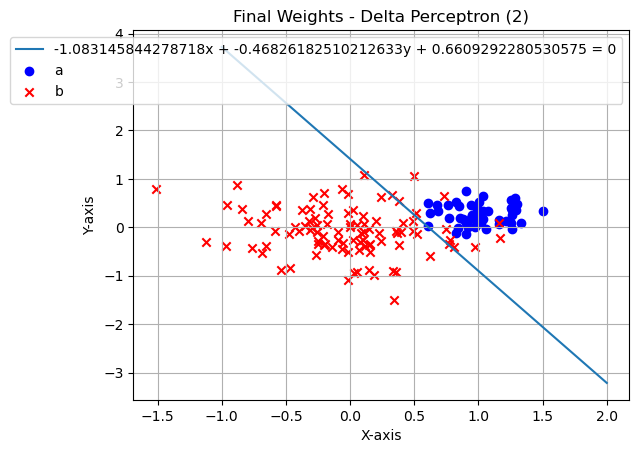

[ 0.66092923 -1.08314584 -0.46826183]


In [93]:
_a = p.W[1]
_b = p.W[2]
_c = p.W[0]
y = (-_a / _b) * x - (_c / _b) # ax + by + c = 0
plt.title("Final Weights - Delta Perceptron (2)")

plt.plot(x, y, label=f'{_a}x + {_b}y + {_c} = 0')
plt.scatter(a_new[0,:], a_new[1,:], c='b', label='a', marker='o')
plt.scatter(b_new[0,:], b_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p.W)

In [94]:
holdout = a_holdout
holdout[:,:5]

array([[ 1.34162625,  1.10390104,  1.19608071,  1.35861852,  0.94617045],
       [ 0.49671078,  0.13785999,  0.76415978,  0.10865802,  0.66061637],
       [-1.        , -1.        , -1.        , -1.        , -1.        ]])

In [95]:
X_holdout = np.vstack((np.ones(50), holdout[:2, :]))
y_holdout = holdout[2,:]
X_holdout[:,:5], y_holdout[:5]

(array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.34162625, 1.10390104, 1.19608071, 1.35861852, 0.94617045],
        [0.49671078, 0.13785999, 0.76415978, 0.10865802, 0.66061637]]),
 array([-1., -1., -1., -1., -1.]))

In [96]:
predictions = p.predict(X_holdout)
diff = predictions - y_holdout
predictions, diff

(array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [97]:
accuracy = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy

1.0

------------

- random 50% from class B

In [98]:
a_new = a
a.shape

(3, 100)

In [99]:
lim = int(0.5*n)
b_holdout = b[:, lim:]
b_new = b[:, :lim]
b_new.shape, b_holdout.shape

((3, 50), (3, 50))

In [100]:
dataset = np.hstack((a_new,b_new))
dataset[:,:5], dataset.shape

(array([[ 0.98796066,  0.93963133,  0.82262388,  0.95734299,  1.25857668],
        [ 0.3648956 ,  0.19347596,  0.52349499,  0.22299518,  0.36391676],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]),
 (3, 150))

In [101]:
dataset = np.vstack((np.ones(150), dataset))
dataset.shape, dataset[:,:5]

((4, 150),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 0.98796066,  0.93963133,  0.82262388,  0.95734299,  1.25857668],
        [ 0.3648956 ,  0.19347596,  0.52349499,  0.22299518,  0.36391676],
        [-1.        , -1.        , -1.        , -1.        , -1.        ]]))

In [102]:
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-1.11998512,  0.49880772,  0.52003104,  1.31685857, -0.39551527],
       [-0.29781148,  1.05054614, -0.1397109 ,  0.11838816, -0.07172198],
       [ 1.        ,  1.        ,  1.        , -1.        ,  1.        ]])

In [103]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 150), (150,))

In [104]:
p = PerceptronDeltaRuleClassifier(0.01)

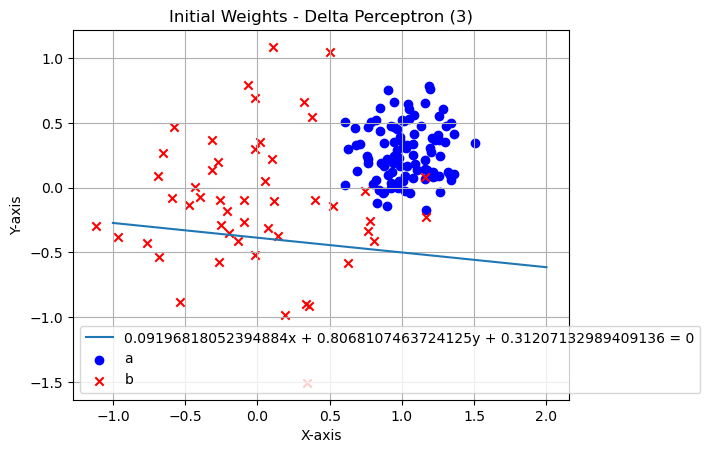

[0.31207133 0.09196818 0.80681075]


In [105]:
_a = p.W[1]
_b = p.W[2]
_c = p.W[0]
y = (-_a / _b) * x - (_c / _b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron (3)")

plt.plot(x, y, label=f'{_a}x + {_b}y + {_c} = 0')
plt.scatter(a_new[0,:], a_new[1,:], c='b', label='a', marker='o')
plt.scatter(b_new[0,:], b_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p.W)

In [106]:
for _ in range(200):
    p.fit_one_epoch(X_train, y_train)

1.0312091641827092
Weights after 0 points: [0.32238342 0.08041879 0.80373969]
-0.20686256482150966
0.7503891022886484
-1.5322706536811532
0.7697501634422441
-1.4562665478730223
-1.7105158644364802
1.043148292601274
-1.6224300411480064
-1.5843337106025426
-1.6165523314155847
Weights after 10 points: [ 0.25072398 -0.03433513  0.76495192]
-1.366461425532661
-1.2925029408451425
0.6098317649139273
1.0740508178148414
-1.534244298555684
-1.3289516124463026
-1.2190059693050628
0.988994395392633
-1.2542584438015232
-1.3221913743277893
Weights after 20 points: [ 0.18427659 -0.12831169  0.73619039]
1.5366069831109188
1.1052945919629504
-1.2479968125948497
-1.2251984217268768
-1.097671643762727
-1.0891248405599792
-1.1511494011942653
-1.0211334985724696
1.5595215528980717
0.7551019952815098
Weights after 30 points: [ 0.16551909 -0.19561037  0.69084474]
-0.924712492706018
-1.0133245475858879
0.12593217792197364
-0.94390492124795
1.2819322894818839
-0.9819855247387401
-1.1026712740534566
-0.85800749

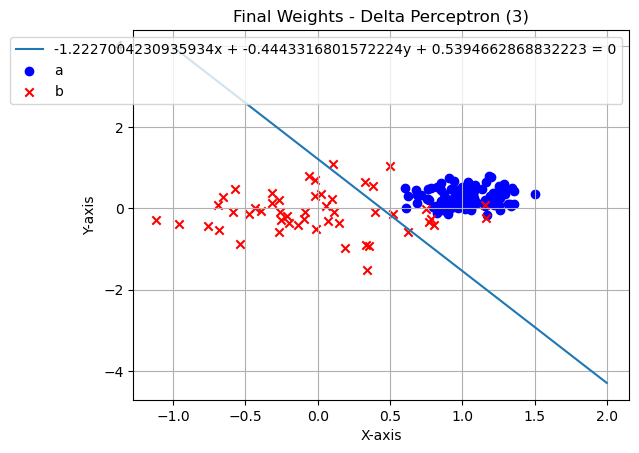

[ 0.53946629 -1.22270042 -0.44433168]


In [107]:
_a = p.W[1]
_b = p.W[2]
_c = p.W[0]
y = (-_a / _b) * x - (_c / _b) # ax + by + c = 0

plt.title("Final Weights - Delta Perceptron (3)")

plt.plot(x, y, label=f'{_a}x + {_b}y + {_c} = 0')
plt.scatter(a_new[0,:], a_new[1,:], c='b', label='a', marker='o')
plt.scatter(b_new[0,:], b_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p.W)

In [108]:
holdout = b_holdout
holdout[:,:5]

array([[-0.20241882,  0.19837658, -0.79496196,  0.36654213, -0.37121441],
       [-0.37020227,  0.13117239,  0.12175783, -0.11882495,  0.36554579],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

In [109]:
X_holdout = np.vstack((np.ones(50), holdout[:2, :]))
y_holdout = holdout[2,:]
X_holdout[:,:5], y_holdout[:5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.20241882,  0.19837658, -0.79496196,  0.36654213, -0.37121441],
        [-0.37020227,  0.13117239,  0.12175783, -0.11882495,  0.36554579]]),
 array([1., 1., 1., 1., 1.]))

In [110]:
predictions = p.predict(X_holdout)
diff = predictions - y_holdout
diff

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.,  0.,  0., -2.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., -2.,  0., -2.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0., -2.,  0.,  0.,  0.,  0.,  0.])

In [111]:
accuracy = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy

0.88

---------------

- 20% from a subset of classA for which classA(1,:)<0 and 80% from a subset of classA for which classA(1,:)>0

In [112]:
a_new = a

In [113]:
b_less_zero = b[:, b[0, :] < 0]
b_more_zero = b[:, b[0, :] >= 0]
b_less_zero.shape, b_more_zero.shape

((3, 52), (3, 48))

In [114]:
l1 = int(b_less_zero.shape[1]/5)
print(l1)
b_less_zero_holdout = b_less_zero[:, :l1]
b_less_zero = b_less_zero[:, l1:]

l2 = int(b_more_zero.shape[1]/5*4)
print(l2)
b_more_zero_holdout = b_more_zero[:, :l2]
b_more_zero = b_more_zero[:, l2:]

b_more_zero.shape, b_less_zero.shape, b_more_zero_holdout.shape, b_less_zero_holdout.shape

10
38


((3, 10), (3, 42), (3, 38), (3, 10))

In [115]:
kept = np.hstack((b_less_zero, b_more_zero, a_new))
dataset = np.vstack((np.ones(kept.shape[1]), kept))
dataset[:, :4], dataset.shape

(array([[ 1.        ,  1.        ,  1.        ,  1.        ],
        [-0.09223476, -0.06247884, -0.2536306 , -0.58804995],
        [-0.26209357,  0.79514807, -0.28808247, -0.08037468],
        [ 1.        ,  1.        ,  1.        ,  1.        ]]),
 (4, 152))

shuffle

In [116]:
rng.shuffle(dataset, axis=1)
dataset[:,:5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.28642063, -0.28806553, -0.79496196, -0.30876394, -0.65332494],
       [ 0.60918989,  0.62123583,  0.12175783, -0.04992418,  0.27076779],
       [-1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

In [117]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 152), (152,))

In [118]:
holdout = np.hstack((b_less_zero_holdout, b_more_zero_holdout))
holdout_set = np.vstack((np.ones(holdout.shape[1]), holdout))
holdout_set[:,:4]

array([[ 1.        ,  1.        ,  1.        ,  1.        ],
       [-0.31654062, -0.26095112, -0.01735052, -0.57568662],
       [ 0.13661221, -0.09905774,  0.29986134,  0.46806386],
       [ 1.        ,  1.        ,  1.        ,  1.        ]])

In [119]:
X_holdout = holdout_set[:3,:]
y_holdout = holdout_set[3,:]
X_holdout.shape, y_holdout.shape

((3, 48), (48,))

now ready

In [120]:
p = PerceptronDeltaRuleClassifier(0.01)

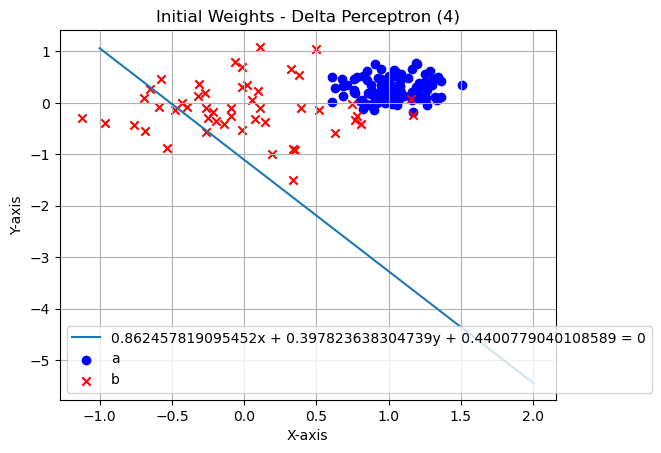

[0.4400779  0.86245782 0.39782364]


In [121]:
_a = p.W[1]
_b = p.W[2]
_c = p.W[0]
y = (-_a / _b) * x - (_c / _b) # ax + by + c = 0
plt.title("Initial Weights - Delta Perceptron (4)")

plt.plot(x, y, label=f'{_a}x + {_b}y + {_c} = 0')
plt.scatter(a_new[0,:], a_new[1,:], c='b', label='a', marker='o')
plt.scatter(b_new[0,:], b_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p.W)

In [122]:
for _ in range(200):
    p.fit_one_epoch(X_train, y_train)

-2.7919115757814827
Weights after 0 points: [0.41215879 0.82654209 0.3808156 ]
0.5893632061446424
1.1908543766342001
0.8410652918512926
0.9882553422531173
-2.4700366082525553
0.7924010419278518
-2.2212316415937634
-2.3147427228078006
0.7324435928736011
0.8591513579979073
Weights after 10 points: [0.40203402 0.73442634 0.35567246]
0.9000118522868028
0.616050126755316
-2.352019140514451
-2.494675352962588
-2.086925932586298
-2.2623681664247055
-2.206942764668841
-1.8142671162974142
-2.0894973467505222
-2.0410024680290486
Weights after 20 points: [0.24371766 0.53161852 0.30047295]
-1.9793564992631925
-1.7178676426281203
-1.7134881230286523
-1.8639151003700152
1.4209208086963718
-1.6674630894672764
1.264238263100901
-1.8960313853981812
-1.6880842854320726
1.0937705740149821
Weights after 30 points: [0.15624489 0.35787265 0.25712557]
0.9014654989639734
-1.6791452927052695
-1.3964444273204095
1.1483518145517353
0.8858827225409919
0.6267269913583129
-1.5290112743919164
1.1959008550324997
-1.4

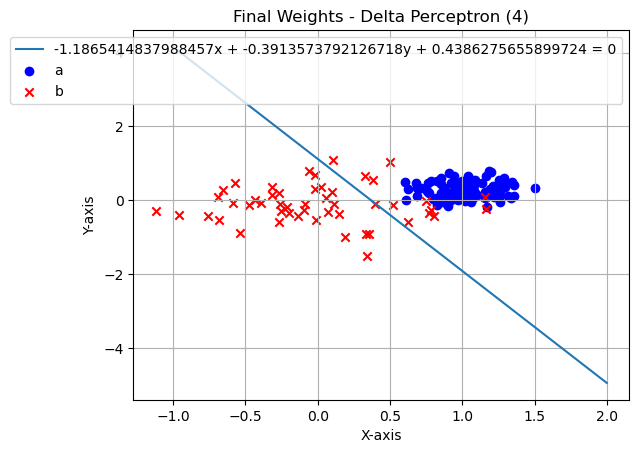

[ 0.43862757 -1.18654148 -0.39135738]


In [123]:
_a = p.W[1]
_b = p.W[2]
_c = p.W[0]
y = (-_a / _b) * x - (_c / _b) # ax + by + c = 0

plt.title("Final Weights - Delta Perceptron (4)")

plt.plot(x, y, label=f'{_a}x + {_b}y + {_c} = 0')
plt.scatter(a_new[0,:], a_new[1,:], c='b', label='a', marker='o')
plt.scatter(b_new[0,:], b_new[1,:], c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p.W)

In [124]:
predictions = p.predict(X_holdout)
diff = predictions - y_holdout
predictions, diff

(array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,
        -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,
         1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        -2.,  0., -2., -2., -2.,  0.,  0.,  0., -2.,  0., -2.,  0.,  0.,
        -2., -2., -2.,  0., -2., -2., -2.,  0.,  0.,  0.,  0.,  0., -2.,
        -2., -2.,  0.,  0.,  0., -2.,  0.,  0.,  0.]))

In [125]:
accuracy = np.sum(np.array(diff == 0, dtype=int)) / len(diff)
accuracy

0.6666666666666666